# Problem 1: A Two-Layer Neural Network for Binary Classification

In [1]:
import pandas as pd
import numpy as np
import os
import gzip
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm

# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
## Load fashionMNIST. This is the same code with homework 1.
##
def crop_center(img,cropped):
    img = img.reshape(-1, 28, 28)
    start = 28//2-(cropped//2)
    img = img[:, start:start+cropped, start:start+cropped]
    return img.reshape(-1, cropped*cropped)

def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz'% kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), 'B', offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(),'B', offset=16).reshape(-1, 784)
        images = crop_center(images, 24)
    return images, labels
X_train_and_val, y_train_and_val = load_mnist('./data/mnist', kind='train')
X_test, y_test = load_mnist('./data/mnist', kind='t10k')
X_train, X_val = X_train_and_val[:50000], X_train_and_val[50000:]
y_train, y_val = y_train_and_val[:50000], y_train_and_val[50000:]
print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Val data shape: ', X_val.shape)
print('Val target shape: ', y_val.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (50000, 576)
Train target shape:  (50000,)
Val data shape:  (10000, 576)
Val target shape:  (10000,)
Test data shape:  (10000, 576)
Test target shape:  (10000,)


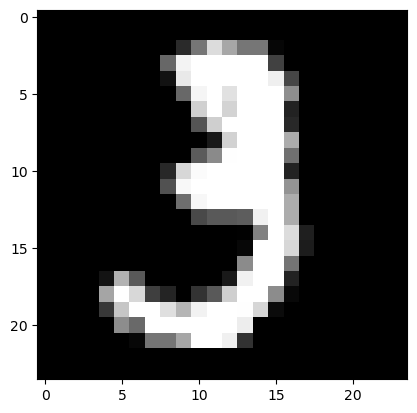

Label is Odd


In [3]:
# PART (a):
# To Visualize a point in the dataset
index = 10
X = np.array(X_train[index], dtype='uint8').reshape([24, 24])
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] in set([1, 3, 5, 7, 9]):
    label = 'Odd'
else:
    label = 'Even'
print('Label is', label)

In the following cells, you will build a two-layer neural network.

In [4]:
# convert to binary label
y_train = y_train.astype(int) % 2
y_val = y_val.astype(int) % 2
y_test = y_test.astype(int) % 2

In [5]:
class TwoLayerNet(object):
    """
    A two-layer fully-connected neural network for binary classification.
    We train the network with a softmax output and cross entropy loss function
    with L2 regularization on the weight matrices. The network uses a ReLU
    nonlinearity after the first fully connected layer.
    Input: X
    Hidden states for layer 1: h1 = XW1 + b1
    Activations: a1 = ReLU(h1)
    Hidden states for layer 2: h2 = a1W2 + b2
    Probabilities: s = softmax(h2)

    ReLU function:
    (i) x = x if x >= 0  (ii) x = 0 if x < 0

    The outputs of the second fully-connected layer are the scores for each class.
    """

    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        """
        Initialize the model. Weights are initialized to small random values and
        biases are initialized to zero. Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def loss(self, X, y=None, reg=0.0):
        """
        Compute the loss and gradients for a two layer fully connected neural
        network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C. This parameter is optional; if it
          is not passed then we only return scores, and if it is passed then we
          instead return the loss and gradients.
        - reg: Regularization strength.

        Returns:
        If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
        the score for class c on input X[i].

        If y is not None, instead return a tuple of:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples.
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape

        # Compute the forward pass

        ### ========== TODO : START ========== ###
        #   Calculate the output of the neural network using forward pass.
        #   The expected result should be a matrix of shape (N, C), where:
        #     - N is the number of examples in the input dataset 'X'.
        #     - C is the number of classes.
        #   Use 'h1' as the first hidden layer output
        h1=np.dot(X, self.params['W1']) + self.params['b1']
        #   Apply the ReLU activation function to 'h1' to get 'a1'. Use np.maximum for ReLU implementation.
        a1 = np.maximum(0, h1)
        #   The output 'scores' is the result of the second layer (before applying softmax).
        scores = np.dot(a1, self.params['W2']) + self.params['b2']
        #   Refer to the model architecture comments at the beginning of this class for more details.
        #   Note: Do not use a for loop in your implementation.
        ##  Part (b): Implement the forward pass and compute scores.
        
        ### ========== TODO : END ========== ###


        # If the targets are not given then jump out, we're done
        if y is None:
            return scores
        
        if y.ndim == 1:
            y_one_hot = np.zeros((N, W2.shape[1]))
            y_one_hot[np.arange(N), y] = 1
        else:
            y_one_hot = y

        # Compute the loss
        loss = None

        # scores is num_examples by num_classes (N, C)
        def softmax_loss(x, y):
            ### ========== TODO : START ========== ###
            #   Calculate the cross entropy loss after softmax output layer.
            #   This function should return loss and dx
            #probs = np.exp(x - np.max(x, axis=1, keepdims=True)) # Other Notes: 
            #this operation is called stable softmax: numerically more stable as it reduces 
            #overflow issues by not letting the numerator and denominator grow too big.
            #probs /= np.sum(probs, axis=1, keepdims=True)
            
            
            shifted_logits = x - np.max(x, axis=1, keepdims=True)
            Z = np.sum(np.exp(shifted_logits), axis=1, keepdims=True)
            log_probs = shifted_logits - np.log(Z)
            probs = np.exp(log_probs)
            
            N = x.shape[0]
            ##  Part (d): Implement the CrossEntropyLoss
            loss = -np.sum(y * log_probs) / N
            ##  Part (d): Implement the gradient of y wrt x
            dx = (probs - y) / N

            ### ========== TODO : END ========== ###
            return loss, dx

        
        data_loss, dscore = softmax_loss(scores, y_one_hot)
        

        ### ========== TODO : START ========== ###
        #   Calculate the regularization loss. Multiply the regularization
        #   loss by 0.5 (in addition to the regularization factor 'reg').
        ##  Part (c): Implement the regularization loss
        reg_loss = 0.5 * reg * (np.sum(W1 * W1) + np.sum(W2 * W2))
        
        ### ========== TODO : END ========== ###

        loss = data_loss + reg_loss


        grads = {}

        ### ========== TODO : START ========== ###
        #  Compute backpropagation
        #  Remember the loss contains two parts: cross-entropy and regularization. 
        # The computation for gradients of W1 and b1 shown here can be regarded as a reference.
        ## Part (e): Implement the computations of gradients for W2 and b2.
        grads['W2'] = np.dot(a1.T, dscore) + reg * W2
        grads['b2'] = np.sum(dscore, axis=0) 

        dh = np.dot(dscore, W2.T)
        dh[a1 <= 0] = 0

        grads['W1'] = np.dot(X.T, dh) + reg * W1
        #grads['b1'] = np.ones(N).dot(dh)
        grads['b1'] = np.sum(dh, axis=0) 
        ### ========== TODO : END ========== ###

        return loss, grads

    def train(self, X, y, X_val, y_val,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=1e-5, num_iters=100,
            batch_size=200, verbose=False):
        """
        Train this neural network using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) giving training data.
        - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
          X[i] has label c, where 0 <= c < C.
        - X_val: A numpy array of shape (N_val, D) giving validation data.
        - y_val: A numpy array of shape (N_val,) giving validation labels.
        - learning_rate: Scalar giving learning rate for optimization.
        - learning_rate_decay: Scalar giving factor used to decay the learning rate
          after each epoch.
        - reg: Scalar giving regularization strength.
        - num_iters: Number of steps to take when optimizing.
        - batch_size: Number of training examples to use per step.
        - verbose: boolean; if true print progress during optimization.
        """
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []

        for it in np.arange(num_iters):
            X_batch = None
            y_batch = None

            #   Create a minibatch (X_batch, y_batch) by sampling batch_size
            #   samples randomly.

            b_index = np.random.choice(num_train, batch_size)
            X_batch = X[b_index]
            y_batch = y[b_index]

            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_history.append(loss)


            self.params['W1'] -= learning_rate * grads['W1']
            self.params['b1'] -= learning_rate * grads['b1']
            self.params['W2'] -= learning_rate * grads['W2']
            self.params['b2'] -= learning_rate * grads['b2']


            if verbose and it % 100 == 0:
                print('iteration {} / {}: loss {}'.format(it, num_iters, loss))

            # Every epoch, check train and val accuracy and decay learning rate.
            if it % iterations_per_epoch == 0:
                # Check accuracy
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)

                # Decay learning rate
                learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }

    def predict(self, X):
        """
        Use the trained weights of this two-layer network to predict labels for
        data points. For each data point we predict scores for each of the C
        classes, and assign each data point to the class with the highest score.

        Inputs:
        
        
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          classify.

        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
          the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
          to have class c, where 0 <= c < C.
        """
        y_pred = None

        ### ========== TODO : START ========== ###
        #   Predict the class given the input data.
        ##  Part (f): Implement the prediction function
        h = np.maximum(0, np.dot(X, self.params['W1']) + self.params['b1'])
        scores = np.dot(h, self.params['W2']) + self.params['b2']
        y_pred = np.argmax(scores, axis=1)

        ### ========== TODO : END ========== ###

        return y_pred

In [6]:
input_size = 576
hidden_size = 50
num_classes = 2
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
for learning_rate in [1e-5, 1e-4, 1e-3, 5e-3, 1e-1]:
    print('learning_rate: ', learning_rate)
    stats = net.train(X_train, y_train, X_val, y_val,
              num_iters=1000, batch_size=200,
              learning_rate=learning_rate, learning_rate_decay=0.95,
              reg=0.1, verbose=True)

    # Predict on the validation set
    val_acc = (net.predict(X_val) == y_val).mean()
    print('Validation accuracy: ', val_acc)

    # Save this net as the variable subopt_net for later comparison.
    subopt_net = net
    test_acc = (subopt_net.predict(X_test) == y_test).mean()
    print('Test accuracy (subopt_net): ', test_acc)
    print('\n')

learning_rate:  1e-05
iteration 0 / 1000: loss 0.6931612201514842
iteration 100 / 1000: loss 0.6931458855346444
iteration 200 / 1000: loss 0.6931212971576897
iteration 300 / 1000: loss 0.6930952908562985
iteration 400 / 1000: loss 0.6930526095224442
iteration 500 / 1000: loss 0.6929951796505565
iteration 600 / 1000: loss 0.6929417822800262
iteration 700 / 1000: loss 0.6928767315148259
iteration 800 / 1000: loss 0.692735299875578
iteration 900 / 1000: loss 0.6924231541807353
Validation accuracy:  0.7168
Test accuracy (subopt_net):  0.7193


learning_rate:  0.0001
iteration 0 / 1000: loss 0.6924146308208956
iteration 100 / 1000: loss 0.6591153875714295
iteration 200 / 1000: loss 0.46075401299809776
iteration 300 / 1000: loss 0.3729930470715791
iteration 400 / 1000: loss 0.3378848663881613
iteration 500 / 1000: loss 0.3314818059099768
iteration 600 / 1000: loss 0.38090188791293794
iteration 700 / 1000: loss 0.27570760683660667
iteration 800 / 1000: loss 0.32576526488664365
iteration 900 /